<a href="https://colab.research.google.com/github/dev-SR/machine-learning/blob/main/03plotly/plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly.py

In [13]:
"""
cd .\03plotly\
jupyter nbconvert --to markdown plotly.ipynb --output README.md

 """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# plotly
import plotly.express as px
import plotly.graph_objs as go


## Scatter Plot

### 2D scatter

In [ ]:
# Create a sample DataFrame
df = px.data.tips()
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
# Create a 2D scatter plot
fig = px.scatter(df, x='total_bill', y='tip')
fig.show()

In [ ]:
fig = px.scatter(df, x='total_bill', y='tip' , color='smoker',size='size')
fig.show()

If you want to see `day` information while hovering then ->

In [ ]:
fig = px.scatter(df, x='total_bill', y='tip' , color='smoker',size='size', hover_data=['day'])
fig.show()

### 3D scatter

In [5]:
!pip install umap-learn > null


In [11]:
from umap import UMAP
import plotly.express as px
df = px.data.iris()
features = df.loc[:, :'petal_width']
umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(features)

# Don't need to do this in matplotlib way:
# for i, s in enumerate(species):
#     # Add a scatter plot to the subplot
#     fig.add_trace(go.Scatter3d(x=x,y=y,z=z,mode='markers', name=s))

fig = px.scatter_3d(
    proj_3d, x=0, y=1, z=2, # column name in df
    color=df.species, # labels={'color': 'species'}
)

# IMPORTANT: color=df.species here always pass string to color for distint color usage, 
# otherwise will be continous which will be hard to differentiate
# so if the `df.species` were int type then you would have converted to string with `df.species.astype(str)`


fig.update_traces(marker_size=5)
fig.show()

Advance 3D plotting:

In [20]:
np.random.seed(0)
# Generating two clusters of 100 data points each with different means and same covariance
mean1 = np.array([1, 2, 3])
mean2 = np.array([4, 5, 6])
cov = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
C1 = np.random.multivariate_normal(mean1, cov, 1000)
C2 = np.random.multivariate_normal(mean2, cov, 1000)

# Finding the center points of the clusters
c1 = np.mean(C1, axis=0)
c2 = np.mean(C2, axis=0)

# Defining the line passing through the center points
a = c1
b = c2
t = np.linspace(-1, 2, 100)
line = a + t[:, np.newaxis] * (b - a)

# Projecting the data points onto the line
def projection_onto_line(data_points, line, a, b):
    # Finding the unit vector along the line
    line_vector = b - a
    unit_vector = line_vector / np.linalg.norm(line_vector)
    unit_vector = unit_vector[np.newaxis, :]

    # Calculating the projection of each data point onto the line
    projections = np.dot(data_points - a, unit_vector.T) * unit_vector + a
    return projections


C1_projections = projection_onto_line(C1, line, a, b)
C2_projections = projection_onto_line(C2, line, a, b)

# Plotting the scatter plot of the two clusters and the projections onto the line
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=C1[:, 0], y=C1[:, 1], z=C1[:, 2],
                      mode='markers', marker=dict(size=3, color='red', opacity=0.3), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=C2[:, 0], y=C2[:, 1], z=C2[:, 2],
                      mode='markers', marker=dict(size=3, color='blue', opacity=0.3), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=C1_projections[:, 0], y=C1_projections[:, 1], z=C1_projections[:, 2],
                      mode='markers', marker=dict(size=2, color='red', symbol='x'), name='Cluster 1 Projections'))
fig.add_trace(go.Scatter3d(x=C2_projections[:, 0], y=C2_projections[:, 1], z=C2_projections[:, 2],
                      mode='markers', marker=dict(size=2, color='blue', symbol='x'), name='Cluster 2 Projections'))
fig.add_trace(go.Scatter3d(x=line[:, 0], y=line[:, 1], z=line[:, 2],
                      mode='lines', line=dict(color='black', width=2), name='Line'))

# camera control; will be helpfull for saving 3d fig
# https://plotly.com/python/3d-camera-controls/
camera = dict(
       eye=dict(x=0, y=1, z=0)
)

fig.update_layout(go.Layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')),
    width=1200,height=800,
    scene_camera=camera)
fig.show()



## Save to Pdf/PNG..

In [ ]:
# !pip install -U kaleido

In [ ]:
fig = px.scatter(df, x='total_bill', y='tip' , color='smoker',size='size')
fig.write_image('scatter_plot.pdf', format='pdf', width=1000, height=500, scale=3.33)
# scale ~ (width / dpi) =  (1000 / 300) = 3.33


## 🔥 Example

### Joint PDFs + Area Under Curve

#### Single plot

In [ ]:
from scipy.integrate import quad
from scipy.stats import multivariate_normal
# def pdf(data, mean: float, variance: float):
#   # A normal continuous random variable.
#   s1 = 1 / (np.sqrt(2 * np.pi * variance))
#   s2 = np.exp(-(np.square(data - mean) / (2 * variance)))
#   return s1 * s2
np.random.seed(0)
PC1 = np.random.normal(1, 1, 100)
PC2 = np.random.normal(0, 1, 100)
text1 = "PC1"
text2 = "PC2"
x_start, x_end = -10, 10
x = np.linspace(x_start, x_end, 1000)
pdf1 = multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var())
pdf2 = multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())
AUC = np.min(np.vstack((pdf1, pdf2)), axis=0)

# Overlap Percentage Calculation
overlap, _ = quad(lambda x: np.minimum(
multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var()), multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())), -np.inf, np.inf)
percent_overlap = 100 * overlap

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=pdf1, name="pdf1"))
fig.add_trace(go.Scatter(x=x, y=pdf2, name="pdf2"))
fig.add_trace(go.Scatter(x=x, y=AUC, fill='tozeroy',fillcolor='rgba(0,100,110,0.5)', name=f"Overlap: {round(percent_overlap,2)}%"))

fig.add_annotation(x=PC1.mean(), y=np.max(pdf1), text=text1,arrowhead=2,showarrow=True)
fig.add_annotation(x=PC2.mean(), y=np.max(pdf2), xref='x', yref='y', text=text2, ax=1, ay=-50, arrowhead=2, arrowsize=1, arrowwidth=1, arrowcolor='black', showarrow=True)

fig.update_layout(width=1000, height=500)
fig.show()

`Matplotlib` Alternative:

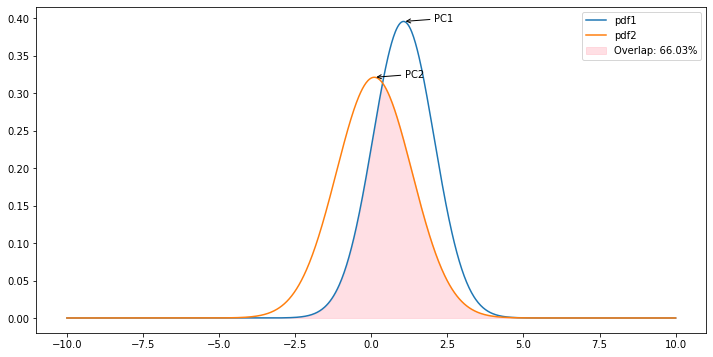

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats import multivariate_normal

np.random.seed(0)
PC1 = np.random.normal(1, 1, 100)
PC2 = np.random.normal(0, 1.2, 100)
text1 = "PC1"
text2 = "PC2"
x_start, x_end = -10, 10
x = np.linspace(x_start, x_end, 1000)
pdf1 = multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var())
pdf2 = multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())
AUC = np.min(np.vstack((pdf1, pdf2)), axis=0)
overlap, _ = quad(lambda x: np.minimum(
multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var()), multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())), -np.inf, np.inf)
percent_overlap = 100 * overlap

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, pdf1, label='pdf1')
ax.plot(x, pdf2, label='pdf2')
ax.fill_between(x, 0, AUC, color='pink', alpha=0.5, label=f"Overlap: {round(percent_overlap,2)}%")
ax.annotate(text1,
            xy=tuple([PC1.mean(), np.max(pdf1)]),
            xytext=tuple([PC1.mean()+1, np.max(pdf1)]),
            arrowprops=dict(arrowstyle="->"),
            )
ax.annotate(text2,
             xy=tuple([PC2.mean(), np.max(pdf2)]),
             xytext=tuple([PC2.mean() + 1, np.max(pdf2)]),
             arrowprops=dict(arrowstyle="->"),
             )

ax.legend()
plt.show()

#### Subplots

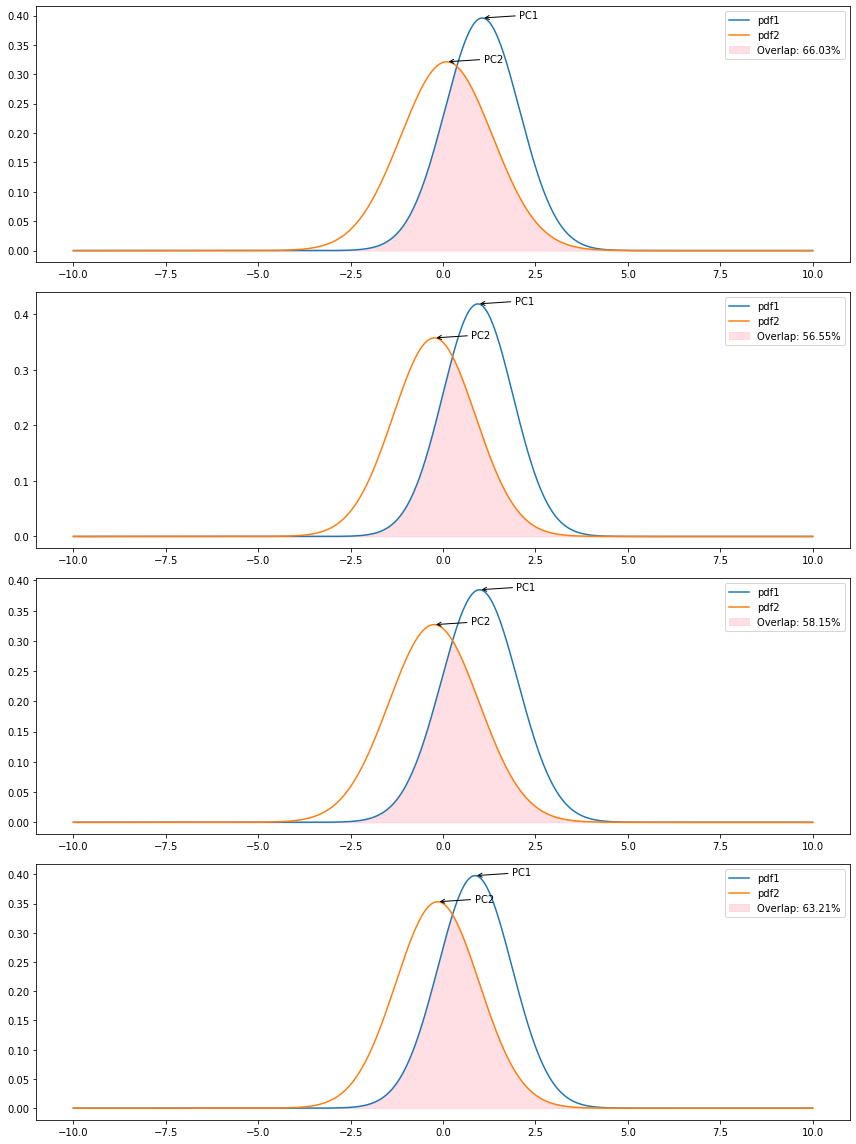

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import multivariate_normal

np.random.seed(0)

n = 4
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(12, 4*n))

for i in range(n):
    PC1 = np.random.normal(1, 1, 100)
    PC2 = np.random.normal(0, 1.2, 100)
    text1 = "PC1"
    text2 = "PC2"
    x_start, x_end = -10, 10
    x = np.linspace(x_start, x_end, 1000)
    pdf1 = multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var())
    pdf2 = multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())
    AUC = np.min(np.vstack((pdf1, pdf2)), axis=0)
    overlap, _ = quad(lambda x: np.minimum(
    multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var()), multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())), -np.inf, np.inf)
    percent_overlap = 100 * overlap

    ax = axes[i]
    ax.plot(x, pdf1, label='pdf1')
    ax.plot(x, pdf2, label='pdf2')
    ax.fill_between(x, 0, AUC, color='pink', alpha=0.5, label=f"Overlap: {round(percent_overlap,2)}%")
    ax.annotate(text1,
                xy=tuple([PC1.mean(), np.max(pdf1)]),
                xytext=tuple([PC1.mean() + 1, np.max(pdf1)]),
                arrowprops=dict(arrowstyle="->"),
                )
    ax.annotate(text2,
                 xy=tuple([PC2.mean(), np.max(pdf2)]),
                 xytext=tuple([PC2.mean() + 1, np.max(pdf2)]),
                 arrowprops=dict(arrowstyle="->"),
                 )
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import plotly.subplots as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import multivariate_normal

np.random.seed(0)
n = 4
fig = sp.make_subplots(rows=n, cols=1)
for i in range(n):
    PC1 = np.random.normal(1, 1, 100)
    PC2 = np.random.normal(0, 1, 100)
    text1 = "PC1"
    text2 = "PC2"
    x_start, x_end = -10, 10
    x = np.linspace(x_start, x_end, 1000)
    pdf1 = multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var())
    pdf2 = multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())
    AUC = np.min(np.vstack((pdf1, pdf2)), axis=0)

    # Overlap Percentage Calculation
    overlap, _ = quad(lambda x: np.minimum(
    multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var()), multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())), -np.inf, np.inf)
    percent_overlap = 100 * overlap

    fig.add_trace(go.Scatter(x=x, y=pdf1, name="pdf1"), row=i+1, col=1)
    fig.add_trace(go.Scatter(x=x, y=pdf2, name="pdf2"), row=i+1, col=1)
    fig.add_trace(go.Scatter(x=x, y=AUC, fill='tozeroy',fillcolor='rgba(0,100,110,0.5)', name=f"Overlap: {round(percent_overlap,2)}%"), row=i+1, col=1)

    fig.add_annotation(x=PC1.mean(), y=np.max(pdf1), text=text1, arrowhead=2, showarrow=True, row=i+1, col=1)
    fig.add_annotation(x=PC2.mean(), y=np.max(pdf2), xref='x', yref='y', text=text2, ax=1, ay=-50, arrowhead=2, arrowsize=1, arrowwidth=1, arrowcolor='black', showarrow=True, row=i+1, col=1)

fig.update_layout(width=1000, height=400*n)
fig.show()
